<a href="https://colab.research.google.com/github/palleramcharan/ML-Repository/blob/main/Car_Dekho_Data_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
car_dekho_data = pd.read_csv ("https://raw.githubusercontent.com/palleramcharan/datasets-for-ML/main/Car%20details%20from%20CarDekho.csv")
car_dekho_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [ ]:
car_dekho_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
print("shape of dataset :" , car_dekho_data.shape)
print("-----------------------------------------")
print("List of Columns")
print("")
print(car_dekho_data.columns)
print("-----------------------------------------")
print("Number of Nulls")
print("")
print(car_dekho_data.isnull().sum())

shape of dataset : (8128, 13)
-----------------------------------------
List of Columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')
-----------------------------------------
Number of Nulls

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64


In [ ]:
car_dekho_data=car_dekho_data.dropna(axis=0,how ='any') #dropping null / na values
car_dekho_data=car_dekho_data.drop_duplicates()  # dropping duplicates
print(car_dekho_data.isna().sum())
print("")
print("Total Non-Nulls Data size",len(car_dekho_data))

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

Total Non-Nulls Data size 6717


In [ ]:
car_dekho_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
car_dekho_data["fuel"].value_counts()

Diesel    3658
Petrol    2973
CNG         51
LPG         35
Name: fuel, dtype: int64

In [ ]:
# remove bhp from max_power , so that will be in interger type
car_dekho_data['max_power']=car_dekho_data['max_power'].apply(lambda x : x.split()[0] if type(x)==str else np.nan )
car_dekho_data['max_power'] = car_dekho_data['max_power'].astype("float")

# remove CC from engine , so that will be in interger type
car_dekho_data['engine']=car_dekho_data['engine'].apply(lambda x : x.split()[0] if type(x)==str else np.nan )
car_dekho_data['engine'] = car_dekho_data['engine'].astype("float")

# remove kmpl from mileage , so that will be in interger type
car_dekho_data['mileage']=car_dekho_data['mileage'].apply(lambda x : x.split()[0] if type(x)==str else np.nan )
car_dekho_data['mileage'] = car_dekho_data['mileage'].astype("float")

In [ ]:
car_dekho_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


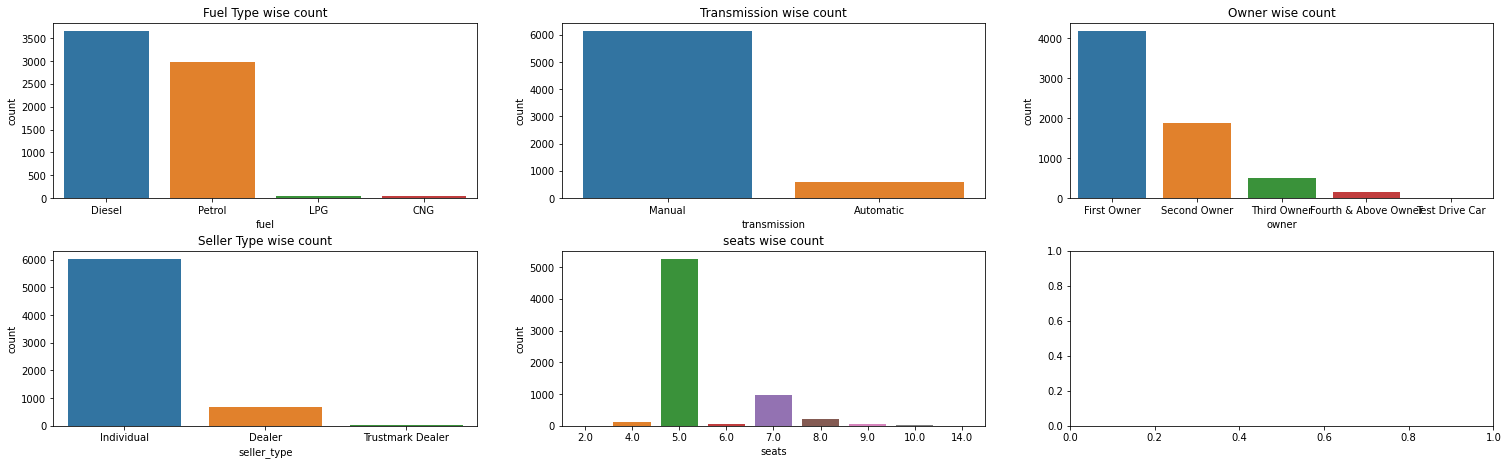

In [ ]:
f,ax=plt.subplots(2,3,figsize=(25,7))

sns.countplot(x='fuel',data=car_dekho_data,ax=ax[0,0])
ax[0,0].set_title("Fuel Type wise count")

sns.countplot(x='transmission',data=car_dekho_data,ax=ax[0,1])
ax[0,1].set_title("Transmission wise count")

sns.countplot(x='owner',data=car_dekho_data,ax=ax[0,2])
ax[0,2].set_title("Owner wise count")

sns.countplot(x='seller_type',data=car_dekho_data,ax=ax[1,0])
ax[1,0].set_title("Seller Type wise count")

sns.countplot(x='seats', data=car_dekho_data,ax=ax[1,1])
ax[1,1].set_title("seats wise count")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.3)

plt.show()

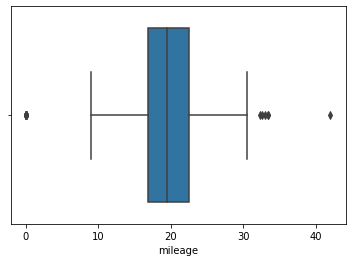

In [ ]:
sns.boxplot(x=car_dekho_data['mileage'])

In [ ]:
#from above boxplot we see some cars having 0 mileage, it does not makesense to have in the dataset so need to drop them
car_dekho_data=car_dekho_data[car_dekho_data['mileage']!=0] 

#to have a column how much the OLD the car is till this year & drop the year/name/torque column

car_dekho_data['years_old']=2022-car_dekho_data['year']
car_dekho_data.drop(["torque","year","name"],axis=1,inplace=True)
car_dekho_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,years_old
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,8
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,8
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,16
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,12
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,15


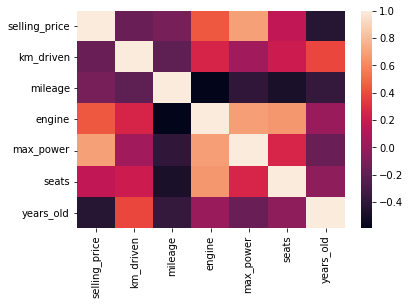

In [ ]:
#correlation Heat Map
sns.heatmap(car_dekho_data.corr())
plt.show()

Now, Its time to Split and Train the data 

In [ ]:
from sklearn.model_selection import train_test_split
y=car_dekho_data.pop("selling_price")
X=car_dekho_data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train.shape, y_train.shape

((5361, 10), (5361,))

In [ ]:
X_test.shape, y_test.shape

((1341, 10), (1341,))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


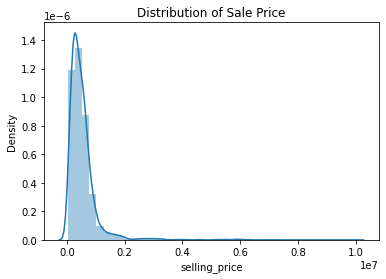

In [ ]:
#To Test the skewness of the data
sns.distplot(y_train, hist=True, kde=True, bins=40).set_title('Distribution of Sale Price')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


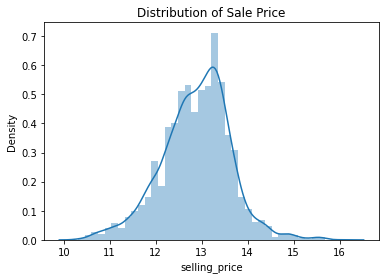

In [ ]:
# As the data is right skewed ,we need to reduce it by tranforming it to symmetric distribution using LOG
y_train = np.log(y_train)
sns.distplot(y_train, hist=True, kde=True, bins=40).set_title('Distribution of Sale Price')
plt.show()

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
model = linear_model.LinearRegression()

In [ ]:
#model.fit(X_train,y_train)

ValueError                                Traceback (most recent call last)
<ipython-input-440-b7a8c64777c1> in <module>()
----> 1 model.fit(X_train,y_train)

6 frames
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py in asarray(a, dtype, order)
     81 
     82     """
---> 83     return array(a, dtype, copy=False, order=order)
     84 
     85 

ValueError: could not convert string to float: 'Diesel'

In [ ]:
# select categorical data and apply get_dummies function on them
categorical_df = X_train.select_dtypes(include=['object',"category"])

categorical_df.head()


,fuel,seller_type,transmission,owner
964,Diesel,Individual,Manual,First Owner
2408,Diesel,Individual,Manual,First Owner
7369,Diesel,Dealer,Automatic,First Owner
1074,Diesel,Dealer,Manual,First Owner
2062,Diesel,Individual,Automatic,Second Owner


In [ ]:
#using get_dummies for encoding purpose which converts a categorical variable into dummy/indicator variables.
dummies = pd.get_dummies(categorical_df, drop_first=True)
dummies.head()

,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
964,1,0,0,1,0,1,0,0,0,0
2408,1,0,0,1,0,1,0,0,0,0
7369,1,0,0,0,0,0,0,0,0,0
1074,1,0,0,0,0,1,0,0,0,0
2062,1,0,0,1,0,0,0,1,0,0


In [ ]:
# drop categories for which we created dummy variables
X_train = X_train.drop(list(categorical_df.columns), axis=1)
X_train.head()

,km_driven,mileage,engine,max_power,seats,years_old
964,151000,12.80,2494.0,102.0,8.0,10
2408,97000,26.00,1498.0,98.6,5.0,8
7369,16000,28.40,1248.0,74.0,5.0,4
1074,63309,19.67,1582.0,126.2,5.0,5
2062,140000,18.88,1995.0,184.0,5.0,10


In [ ]:
# concat both dummy vars df and original df
X_train = pd.concat([X_train,dummies], axis=1)
X_train.head()

,km_driven,mileage,engine,max_power,seats,years_old,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
964,151000,12.80,2494.0,102.0,8.0,10,1,0,0,1,0,1,0,0,0,0
2408,97000,26.00,1498.0,98.6,5.0,8,1,0,0,1,0,1,0,0,0,0
7369,16000,28.40,1248.0,74.0,5.0,4,1,0,0,0,0,0,0,0,0,0
1074,63309,19.67,1582.0,126.2,5.0,5,1,0,0,0,0,1,0,0,0,0
2062,140000,18.88,1995.0,184.0,5.0,10,1,0,0,1,0,0,0,1,0,0


In [ ]:
# Data normalization transforms multiscaled data to the same scale.
# After normalization, all variables have a similar influence on the model, improving the stability and performance of the learning algorithm.
# Applying min max scaling to bring down the values to range from 0-1, as part of normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns,index=X_train.index)
X_train.head()

,km_driven,mileage,engine,max_power,seats,years_old,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
964,0.063970,0.115152,0.627517,0.188453,0.4,0.307692,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2408,0.041093,0.515152,0.293289,0.179194,0.1,0.230769,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
7369,0.006778,0.587879,0.209396,0.112200,0.1,0.076923,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1074,0.026820,0.323333,0.321477,0.254357,0.1,0.115385,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2062,0.059310,0.299394,0.460067,0.411765,0.1,0.307692,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() 
reg.fit(X_train,y_train)
y_pred_train = reg.predict(X_train)

In [ ]:
# Performance metrics

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)


mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)

0.8441563454344927
476.4039558358995
0.0888647557985263


In [ ]:
# Applying the same steps on test data as performed for training data for overcoming skewness


y_test = np.log(y_test)

categorical_df = X_test.select_dtypes(include=['object',"category"])
dummies = pd.get_dummies(categorical_df, drop_first=True)

X_test = X_test.drop(list(categorical_df.columns), axis=1)


X_test = pd.concat([X_test,dummies], axis=1)


# X_test = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns,index=X_test.index)
X_test.head()

,km_driven,mileage,engine,max_power,seats,years_old,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
2844,105000,23.40,1248.0,74.0,5.0,9,1,0,0,1,0,1,0,0,0,1
1691,5000,20.63,1198.0,67.0,5.0,4,0,0,1,1,0,1,0,1,0,0
2939,10000,15.37,1196.0,73.0,5.0,5,0,0,1,1,0,1,0,0,0,0
675,80000,19.10,1197.0,82.0,5.0,6,0,0,1,1,0,1,0,1,0,0
3701,70000,18.60,1197.0,85.8,5.0,10,0,0,1,1,0,1,0,1,0,0


In [ ]:
y_pred_test = reg.predict(X_test)

In [ ]:
# Performance metrics
r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

rss1_lr = np.sum(np.square(y_test - y_pred_test))
print(rss1_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)

-743045702.2482361
522782563910.5392
389845312.38668096
